In [ ]:
# ===============================
# 0. Import Dataset (Google Colab)
# ===============================

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Replace with the exact filename if needed
df = pd.read_csv(io.BytesIO(uploaded['cybersecurity_intrusion_data.csv']))


Saving cybersecurity_intrusion_data.csv to cybersecurity_intrusion_data.csv


In [ ]:
# ==============================
#  1. Import Required Libraries
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
# ================================
#  3. Feature and Target Selection
# ================================

X = df.drop(columns=["session_id", "attack_detected"])  # Features
y = df["attack_detected"]  # Target

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()


In [ ]:
# ======================
#  4. Train-Test Split
# ======================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# ==========================
#  5. Preprocessing Pipeline
# ==========================

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)  # Updated for sklearn >= 1.2
])


In [ ]:
# ========================
#  6. Model Initialization
# ========================

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=200))
])

In [ ]:
# ======================
# 7. Model Training
# ======================

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['network_packet_size',
                                                   'login_attempts',
                                                   'session_duration',
                                                   'ip_reputation_score',
                                                   'failed_logins',
                                                   'unusual_time_access']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['protocol_type',
                                                   'encryption_used',
                                                   'browser_type'])])),
                ('classifier', LogisticRegression(max_iter=200))])

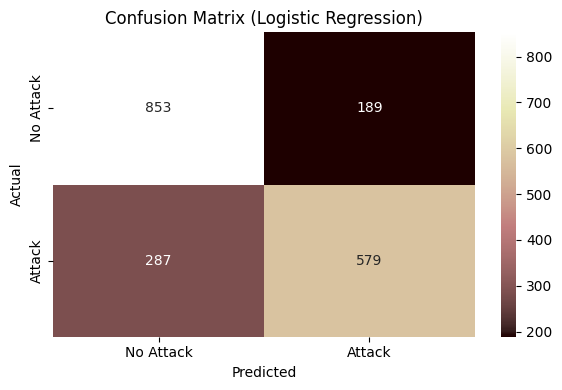

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1042
           1       0.75      0.67      0.71       866

    accuracy                           0.75      1908
   macro avg       0.75      0.74      0.75      1908
weighted avg       0.75      0.75      0.75      1908



In [ ]:
# =========================
# 8. Prediction & Evaluation
# =========================

y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="pink",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
# ============================
#  9. Prediction & Recommendation System
# ============================

# Make predictions on test set
y_pred = model.predict(X_test)

# Map predictions to meaningful labels
predicted_labels = ["Attack" if p == 1 else "No Attack" for p in y_pred]

# Add predictions and recommendations to a DataFrame
results_df = X_test.copy()
results_df["Actual"] = y_test.values
results_df["Predicted"] = predicted_labels

# Add simple security recommendation
def recommend(action):
    return ("🔐 Investigate: Unusual network behavior detected. Check ports, IPs, and logs."
            if action == "Attack" else
            " Normal: No immediate action needed.")

results_df["Recommendation"] = results_df["Predicted"].apply(recommend)

# Display first 10 entries with recommendations
results_df[["Predicted", "Actual", "Recommendation"]].head(10)

,Predicted,Actual,Recommendation
1162,No Attack,0,Normal: No immediate action needed.
2299,No Attack,0,Normal: No immediate action needed.
1149,Attack,1,🔐 Investigate: Unusual network behavior detect...
3945,No Attack,1,Normal: No immediate action needed.
4883,Attack,0,🔐 Investigate: Unusual network behavior detect...
8782,No Attack,0,Normal: No immediate action needed.
4640,No Attack,0,Normal: No immediate action needed.
8768,Attack,1,🔐 Investigate: Unusual network behavior detect...
367,Attack,0,🔐 Investigate: Unusual network behavior detect...
7532,Attack,0,🔐 Investigate: Unusual network behavior detect...
